# 1. Import library

In [1]:
# Dataframe manipulation
import numpy as np
import pandas as pd
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# sns.set(style = 'whitegrid',context = 'notebook')

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setup complete...


# 2. Import dataset

In [2]:
df = pd.read_csv('../diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
org_df = df.copy()

In [5]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# 3. Common function

In [6]:
def Normalization_Data(df, selected_features,scaler):
    
    X_scaled = df[selected_features]
    X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled))
    X_scaled.columns = selected_features
    
    return X_scaled

# 4. Imputation techniques

### Exp01 - Filling data with median

In [7]:
df1 = df.copy()
df1 = df1.fillna(df1.median())
df1 = df1.reset_index(drop=True)

selected_features = [var for var in df1.columns if var not in ['Outcome']]
scaler = MinMaxScaler(feature_range = (0, 1))

X = Normalization_Data(df1,selected_features,scaler)  #independent columns
y = df1['Outcome']    #target column i.e price range

scaled_df1 = pd.concat([X,y],axis=1)
scaled_df1.to_csv('../ds-exp01.csv', index = False)

In [8]:
print(X.index)
print(y.index)
print(scaled_df1.index)

RangeIndex(start=0, stop=768, step=1)
RangeIndex(start=0, stop=768, step=1)
RangeIndex(start=0, stop=768, step=1)


In [9]:
scaled_df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


### Exp02 - Filling data with mean

In [10]:
df2 = df.copy()
df2 = df2.fillna(df2.mean())
df2 = df2.reset_index(drop=True)

selected_features = [var for var in df2.columns if var not in ['Outcome']]
scaler = MinMaxScaler(feature_range = (0, 1))

X = Normalization_Data(df2,selected_features,scaler)  #independent columns
y = df2['Outcome']    #target column i.e price range

scaled_df2 = pd.concat([X,y],axis=1)
scaled_df2.to_csv('ds-exp02.csv', index = False)

In [11]:
print(X.index)
print(y.index)
print(scaled_df2.index)

RangeIndex(start=0, stop=768, step=1)
RangeIndex(start=0, stop=768, step=1)
RangeIndex(start=0, stop=768, step=1)


In [12]:
scaled_df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


### Exp03 - Selecting ratio of 2 classes

# 5. Feature Selection

#### Exp04 - Feature Selection

# 4. Feature Engineering

### 4.1. Generate features to capture missing pattern

#### Exp05 - Missing values pattern

### Experiment 6

In [204]:
df6 = df.copy()
df6 = df6.fillna(df6.mean())
df6 = df6.reset_index(drop=True)

selected_vars = df6.drop(['Outcome'],axis=1).columns
df6[selected_vars] = Normalization_Data(df6,selected_vars,scaler)

df6['AgeDiff'] = df6['Age'] - df6.Age.mean()
df6['PedigreeFunctionDiff'] = df6['DiabetesPedigreeFunction'] - df6.DiabetesPedigreeFunction.mean()
df6['BMIDiff'] = df6['BMI'] - df6.BMI.mean()
df6['InsulinDiff'] = df6['Insulin'] - df6.Insulin.mean()
df6['SkinThicknessDiff'] = df6['SkinThickness'] - df6.SkinThickness.mean()
df6['BloodPressureDiff'] = df6['BloodPressure'] - df6.BloodPressure.mean()
df6['GlucoseDiff'] = df6['Glucose'] - df6.Glucose.mean()
df6['PregnanciesDiff'] = df6['Pregnancies'] - df6.Pregnancies.mean()
df6['TotalDiff'] = df6[['AgeDiff','PedigreeFunctionDiff','BMIDiff','InsulinDiff','SkinThicknessDiff','BloodPressureDiff','GlucoseDiff','PregnanciesDiff']].sum(axis=1)


In [205]:
pd.options.display.float_format = '{:.3f}'.format
df6.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeDiff,PedigreeFunctionDiff,BMIDiff,InsulinDiff,SkinThicknessDiff,BloodPressureDiff,GlucoseDiff,PregnanciesDiff,TotalDiff
0,0.353,0.671,0.490,0.304,0.170,0.315,0.234,0.483,1,0.279,0.066,0.023,0.000,0.064,-0.004,0.170,0.127,0.725
1,0.059,0.265,0.429,0.239,0.170,0.172,0.117,0.167,0,-0.037,-0.052,-0.120,0.000,-0.002,-0.065,-0.237,-0.167,-0.680
2,0.471,0.897,0.408,0.241,0.170,0.104,0.254,0.183,1,-0.021,0.085,-0.187,0.000,0.000,-0.086,0.396,0.244,0.432
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,0,-0.204,-0.130,-0.089,-0.074,-0.067,-0.065,-0.211,-0.167,-1.008
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,1,-0.004,0.775,0.218,0.015,0.064,-0.331,0.099,-0.226,0.610
5,0.294,0.465,0.510,0.241,0.170,0.151,0.053,0.150,0,-0.054,-0.116,-0.140,0.000,0.000,0.016,-0.037,0.068,-0.262
6,0.176,0.219,0.265,0.272,0.089,0.262,0.073,0.083,1,-0.121,-0.096,-0.030,-0.081,0.031,-0.229,-0.282,-0.050,-0.857
7,0.588,0.458,0.494,0.241,0.170,0.350,0.024,0.133,0,-0.071,-0.144,0.058,0.000,0.000,0.000,-0.043,0.362,0.162
8,0.118,0.987,0.469,0.413,0.636,0.252,0.034,0.533,1,0.329,-0.134,-0.040,0.466,0.172,-0.025,0.486,-0.109,1.146
9,0.471,0.523,0.735,0.241,0.170,0.292,0.066,0.550,1,0.346,-0.102,-0.000,0.000,0.000,0.241,0.021,0.244,0.750


In [206]:
df6['row_mean'] = df6[selected_vars].mean(axis=1)
df6['row_std'] = df6[selected_vars].std(axis=1)
df6['row_median'] = df6[selected_vars].median(axis=1)
df6['row_min'] = df6[selected_vars].min(axis=1)
df6['row_max'] = df6[selected_vars].max(axis=1)
df6['MeanStd'] = np.exp(df6['row_mean'])* np.exp(df6['row_std'])
df6['MinMax'] = np.abs(np.exp(df6['row_max'])- np.exp(df6['row_min']))

df6[df6.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeDiff,PedigreeFunctionDiff,BMIDiff,InsulinDiff,SkinThicknessDiff,BloodPressureDiff,GlucoseDiff,PregnanciesDiff,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax


In [207]:
df6.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeDiff,PedigreeFunctionDiff,BMIDiff,InsulinDiff,SkinThicknessDiff,BloodPressureDiff,GlucoseDiff,PregnanciesDiff,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax
0,0.353,0.671,0.490,0.304,0.170,0.315,0.234,0.483,1,0.279,0.066,0.023,0.000,0.064,-0.004,0.170,0.127,0.725,0.378,0.162,0.334,0.170,0.671,1.715,0.771
1,0.059,0.265,0.429,0.239,0.170,0.172,0.117,0.167,0,-0.037,-0.052,-0.120,0.000,-0.002,-0.065,-0.237,-0.167,-0.680,0.202,0.112,0.171,0.059,0.429,1.369,0.474
2,0.471,0.897,0.408,0.241,0.170,0.104,0.254,0.183,1,-0.021,0.085,-0.187,0.000,0.000,-0.086,0.396,0.244,0.432,0.341,0.256,0.247,0.104,0.897,1.816,1.342
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,0,-0.204,-0.130,-0.089,-0.074,-0.067,-0.065,-0.211,-0.167,-1.008,0.161,0.144,0.135,0.000,0.429,1.357,0.535
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,1,-0.004,0.775,0.218,0.015,0.064,-0.331,0.099,-0.226,0.610,0.363,0.304,0.252,0.000,0.944,1.949,1.569
5,0.294,0.465,0.510,0.241,0.170,0.151,0.053,0.150,0,-0.054,-0.116,-0.140,0.000,0.000,0.016,-0.037,0.068,-0.262,0.254,0.161,0.205,0.053,0.510,1.514,0.612
6,0.176,0.219,0.265,0.272,0.089,0.262,0.073,0.083,1,-0.121,-0.096,-0.030,-0.081,0.031,-0.229,-0.282,-0.050,-0.857,0.180,0.087,0.198,0.073,0.272,1.306,0.237
7,0.588,0.458,0.494,0.241,0.170,0.350,0.024,0.133,0,-0.071,-0.144,0.058,0.000,0.000,0.000,-0.043,0.362,0.162,0.307,0.197,0.295,0.024,0.588,1.656,0.777
8,0.118,0.987,0.469,0.413,0.636,0.252,0.034,0.533,1,0.329,-0.134,-0.040,0.466,0.172,-0.025,0.486,-0.109,1.146,0.430,0.305,0.441,0.034,0.987,2.086,1.649
9,0.471,0.523,0.735,0.241,0.170,0.292,0.066,0.550,1,0.346,-0.102,-0.000,0.000,0.000,0.241,0.021,0.244,0.750,0.381,0.225,0.381,0.066,0.735,1.832,1.017


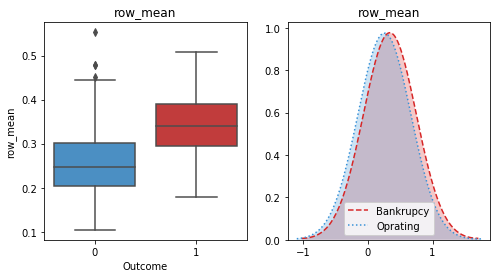

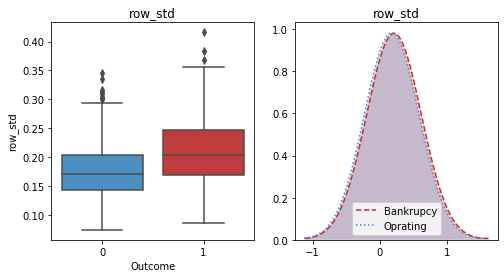

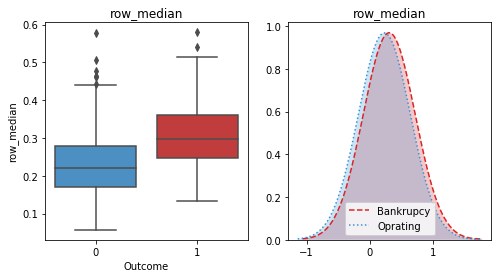

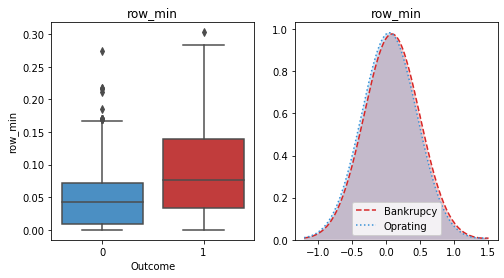

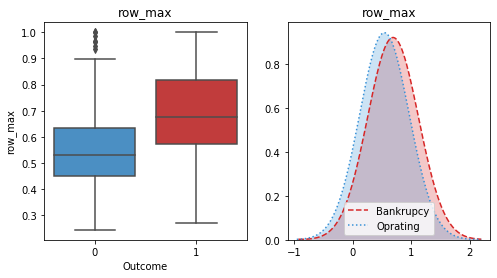

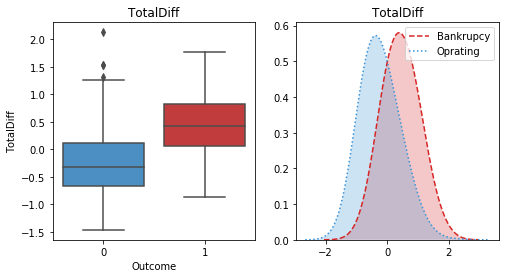

In [208]:
column_headers = ['row_mean','row_std','row_median','row_min','row_max','TotalDiff']
colors = ['#3791D7','#D72626']

for column in column_headers:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Outcome', y=column,data=df6,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(df6[df6['Outcome']==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(df6[df6['Outcome']==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

In [210]:
selected_vars = df6.columns
selected_vars

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeDiff', 'PedigreeFunctionDiff', 'BMIDiff', 'InsulinDiff', 'SkinThicknessDiff', 'BloodPressureDiff', 'GlucoseDiff', 'PregnanciesDiff', 'TotalDiff', 'row_mean', 'row_std', 'row_median', 'row_min', 'row_max', 'MeanStd', 'MinMax'], dtype='object')

In [216]:
selected_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'TotalDiff', 'row_mean', 'row_std', 'row_median', 'row_min', 'row_max', 'MeanStd', 'MinMax']

In [217]:
X = df6[selected_vars]
y = df6['Outcome']    #target column i.e price range

scaled_df6 = pd.concat([X,y],axis=1)
scaled_df6.to_csv('ds-exp06.csv', index = False)
print(scaled_df6.shape)

(768, 17)


In [218]:
print(X.index)
print(y.index)
print(scaled_df6.index)

RangeIndex(start=0, stop=768, step=1)
RangeIndex(start=0, stop=768, step=1)
RangeIndex(start=0, stop=768, step=1)


In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

(576, 16) (192, 16)
0.3489583333333333
0.3489583333333333


Feature ranking:
1. feature 8 (0.118221)
2. feature 1 (0.117082)
3. feature 9 (0.102847)
4. feature 11 (0.079282)
5. feature 14 (0.078704)
6. feature 5 (0.064381)
7. feature 7 (0.056874)
8. feature 12 (0.055726)
9. feature 13 (0.055580)
10. feature 6 (0.050327)
11. feature 15 (0.049307)
12. feature 10 (0.048022)
13. feature 2 (0.039373)
14. feature 4 (0.029540)
15. feature 3 (0.027487)
16. feature 0 (0.027246)


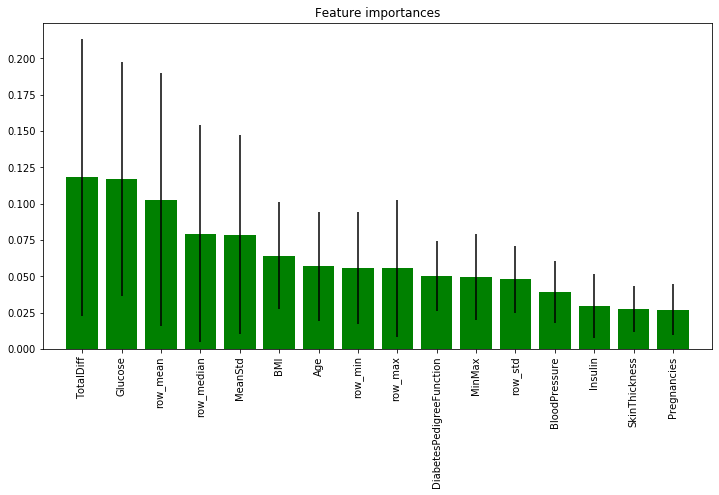

In [220]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [221]:
scaled_df6.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax,Outcome
0,0.353,0.671,0.490,0.304,0.170,0.315,0.234,0.483,0.725,0.378,0.162,0.334,0.170,0.671,1.715,0.771,1
1,0.059,0.265,0.429,0.239,0.170,0.172,0.117,0.167,-0.680,0.202,0.112,0.171,0.059,0.429,1.369,0.474,0
2,0.471,0.897,0.408,0.241,0.170,0.104,0.254,0.183,0.432,0.341,0.256,0.247,0.104,0.897,1.816,1.342,1
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,-1.008,0.161,0.144,0.135,0.000,0.429,1.357,0.535,0
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,0.610,0.363,0.304,0.252,0.000,0.944,1.949,1.569,1


### Exp07

In [283]:
df7 = scaled_df6.copy()

In [284]:
df7.drop(['Outcome'],axis=1).columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'TotalDiff', 'row_mean', 'row_std', 'row_median', 'row_min', 'row_max', 'MeanStd', 'MinMax'], dtype='object')

In [285]:
column_list = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [286]:
standard_profile = pd.DataFrame(columns = ['Mean1','Median1'])
standard_profile['Mean1'] =  df7[df7['Outcome'] == 1][column_list].mean()
standard_profile['Median1'] = df7[df7['Outcome'] == 1][column_list].median()

standard_profile

,Mean1,Median1
Pregnancies,0.286,0.235
Glucose,0.633,0.619
BloodPressure,0.522,0.510
SkinThickness,0.269,0.241
Insulin,0.200,0.170
BMI,0.351,0.328
DiabetesPedigreeFunction,0.202,0.158
Age,0.268,0.250


In [287]:
from scipy import spatial

results  = []
for idx, row in df7[column_list].iterrows():
    result = 1 - spatial.distance.cosine(np.array(row), np.array(list(standard_profile['Median1'])))
    results.append(result)
df7['CosineMed_1'] = results

results  = []
for idx, row in df7[column_list].iterrows():
    result = 1 - spatial.distance.cosine(np.array(row), np.array(list(standard_profile['Mean1'])))
    results.append(result)
df7['CosineMean_1'] = results

df7.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax,Outcome,CosineMed_1,CosineMean_1
0,0.353,0.671,0.490,0.304,0.170,0.315,0.234,0.483,0.725,0.378,0.162,0.334,0.170,0.671,1.715,0.771,1,0.976,0.980
1,0.059,0.265,0.429,0.239,0.170,0.172,0.117,0.167,-0.680,0.202,0.112,0.171,0.059,0.429,1.369,0.474,0,0.940,0.939
2,0.471,0.897,0.408,0.241,0.170,0.104,0.254,0.183,0.432,0.341,0.256,0.247,0.104,0.897,1.816,1.342,1,0.927,0.930
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,-1.008,0.161,0.144,0.135,0.000,0.429,1.357,0.535,0,0.922,0.911
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,0.610,0.363,0.304,0.252,0.000,0.944,1.949,1.569,1,0.716,0.734
5,0.294,0.465,0.510,0.241,0.170,0.151,0.053,0.150,-0.262,0.254,0.161,0.205,0.053,0.510,1.514,0.612,0,0.966,0.966
6,0.176,0.219,0.265,0.272,0.089,0.262,0.073,0.083,-0.857,0.180,0.087,0.198,0.073,0.272,1.306,0.237,1,0.924,0.933
7,0.588,0.458,0.494,0.241,0.170,0.350,0.024,0.133,0.162,0.307,0.197,0.295,0.024,0.588,1.656,0.777,0,0.909,0.919
8,0.118,0.987,0.469,0.413,0.636,0.252,0.034,0.533,1.146,0.430,0.305,0.441,0.034,0.987,2.086,1.649,1,0.904,0.900
9,0.471,0.523,0.735,0.241,0.170,0.292,0.066,0.550,0.750,0.381,0.225,0.381,0.066,0.735,1.832,1.017,1,0.935,0.937


In [288]:
import math
results  = []
for idx, row in df7[column_list].iterrows():
    case1 = np.array(row)
    case2 = np.array(list(standard_profile['Mean1']))
    result = math.sqrt(sum([(case1 - case2) ** 2 for case1, case2 in zip(case1, case2)]))
    results.append(result)
df7['EuclideanMean1'] = results

results  = []
for idx, row in df7[column_list].iterrows():
    case1 = np.array(row)
    case2 = np.array(list(standard_profile['Median1']))
    result = math.sqrt(sum([(case1 - case2) ** 2 for case1, case2 in zip(case1, case2)]))
    results.append(result)
df7['EuclideanMed1'] = results

df7.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax,Outcome,CosineMed_1,CosineMean_1,EuclideanMean1,EuclideanMed1
0,0.353,0.671,0.490,0.304,0.170,0.315,0.234,0.483,0.725,0.378,0.162,0.334,0.170,0.671,1.715,0.771,1,0.976,0.980,0.241,0.285
1,0.059,0.265,0.429,0.239,0.170,0.172,0.117,0.167,-0.680,0.202,0.112,0.171,0.059,0.429,1.369,0.474,0,0.940,0.939,0.498,0.444
2,0.471,0.897,0.408,0.241,0.170,0.104,0.254,0.183,0.432,0.341,0.256,0.247,0.104,0.897,1.816,1.342,1,0.927,0.930,0.435,0.454
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,-1.008,0.161,0.144,0.135,0.000,0.429,1.357,0.535,0,0.922,0.911,0.564,0.499
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,0.610,0.363,0.304,0.252,0.000,0.944,1.949,1.569,1,0.716,0.734,0.891,0.912
5,0.294,0.465,0.510,0.241,0.170,0.151,0.053,0.150,-0.262,0.254,0.161,0.205,0.053,0.510,1.514,0.612,0,0.966,0.966,0.326,0.283
6,0.176,0.219,0.265,0.272,0.089,0.262,0.073,0.083,-0.857,0.180,0.087,0.198,0.073,0.272,1.306,0.237,1,0.924,0.933,0.566,0.520
7,0.588,0.458,0.494,0.241,0.170,0.350,0.024,0.133,0.162,0.307,0.197,0.295,0.024,0.588,1.656,0.777,0,0.909,0.919,0.417,0.428
8,0.118,0.987,0.469,0.413,0.636,0.252,0.034,0.533,1.146,0.430,0.305,0.441,0.034,0.987,2.086,1.649,1,0.904,0.900,0.690,0.706
9,0.471,0.523,0.735,0.241,0.170,0.292,0.066,0.550,0.750,0.381,0.225,0.381,0.066,0.735,1.832,1.017,1,0.935,0.937,0.442,0.464


In [289]:
df7['Avg_Cosine'] = df7[['CosineMed_1','CosineMean_1']].mean(axis=1)
df7['Avg_Eucl'] = df7[['EuclideanMean1','EuclideanMean1']].mean(axis=1)
df7['CosEucl'] = df7['Avg_Cosine']/df7['Avg_Eucl']
df7['DiffEucl'] = df7['TotalDiff']/df7['Avg_Eucl']

df7.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax,Outcome,CosineMed_1,CosineMean_1,EuclideanMean1,EuclideanMed1,Avg_Cosine,Avg_Eucl,CosEucl,DiffEucl
0,0.353,0.671,0.490,0.304,0.170,0.315,0.234,0.483,0.725,0.378,0.162,0.334,0.170,0.671,1.715,0.771,1,0.976,0.980,0.241,0.285,0.978,0.241,4.063,3.012
1,0.059,0.265,0.429,0.239,0.170,0.172,0.117,0.167,-0.680,0.202,0.112,0.171,0.059,0.429,1.369,0.474,0,0.940,0.939,0.498,0.444,0.940,0.498,1.887,-1.365
2,0.471,0.897,0.408,0.241,0.170,0.104,0.254,0.183,0.432,0.341,0.256,0.247,0.104,0.897,1.816,1.342,1,0.927,0.930,0.435,0.454,0.928,0.435,2.136,0.993
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,-1.008,0.161,0.144,0.135,0.000,0.429,1.357,0.535,0,0.922,0.911,0.564,0.499,0.917,0.564,1.624,-1.785
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,0.610,0.363,0.304,0.252,0.000,0.944,1.949,1.569,1,0.716,0.734,0.891,0.912,0.725,0.891,0.815,0.684
5,0.294,0.465,0.510,0.241,0.170,0.151,0.053,0.150,-0.262,0.254,0.161,0.205,0.053,0.510,1.514,0.612,0,0.966,0.966,0.326,0.283,0.966,0.326,2.959,-0.804
6,0.176,0.219,0.265,0.272,0.089,0.262,0.073,0.083,-0.857,0.180,0.087,0.198,0.073,0.272,1.306,0.237,1,0.924,0.933,0.566,0.520,0.929,0.566,1.641,-1.513
7,0.588,0.458,0.494,0.241,0.170,0.350,0.024,0.133,0.162,0.307,0.197,0.295,0.024,0.588,1.656,0.777,0,0.909,0.919,0.417,0.428,0.914,0.417,2.191,0.388
8,0.118,0.987,0.469,0.413,0.636,0.252,0.034,0.533,1.146,0.430,0.305,0.441,0.034,0.987,2.086,1.649,1,0.904,0.900,0.690,0.706,0.902,0.690,1.308,1.662
9,0.471,0.523,0.735,0.241,0.170,0.292,0.066,0.550,0.750,0.381,0.225,0.381,0.066,0.735,1.832,1.017,1,0.935,0.937,0.442,0.464,0.936,0.442,2.120,1.699


In [290]:
df7['LF'] = df7['CosEucl'] * df7['DiffEucl'] 
df7[['Outcome','MeanStd','TotalDiff','CosEucl','DiffEucl','LF','row_mean','row_std']].head(20)

,Outcome,MeanStd,TotalDiff,CosEucl,DiffEucl,LF,row_mean,row_std
0,1,1.715,0.725,4.063,3.012,12.239,0.378,0.162
1,0,1.369,-0.680,1.887,-1.365,-2.576,0.202,0.112
2,1,1.816,0.432,2.136,0.993,2.122,0.341,0.256
3,0,1.357,-1.008,1.624,-1.785,-2.900,0.161,0.144
4,1,1.949,0.610,0.815,0.684,0.558,0.363,0.304
5,0,1.514,-0.262,2.959,-0.804,-2.379,0.254,0.161
6,1,1.306,-0.857,1.641,-1.513,-2.483,0.180,0.087
7,0,1.656,0.162,2.191,0.388,0.851,0.307,0.197
8,1,2.086,1.146,1.308,1.662,2.173,0.430,0.305
9,1,1.832,0.750,2.120,1.699,3.602,0.381,0.225


In [291]:
df7.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'TotalDiff', 'row_mean', 'row_std', 'row_median', 'row_min', 'row_max', 'MeanStd', 'MinMax', 'Outcome', 'CosineMed_1', 'CosineMean_1', 'EuclideanMean1', 'EuclideanMed1', 'Avg_Cosine', 'Avg_Eucl', 'CosEucl', 'DiffEucl', 'LF'], dtype='object')

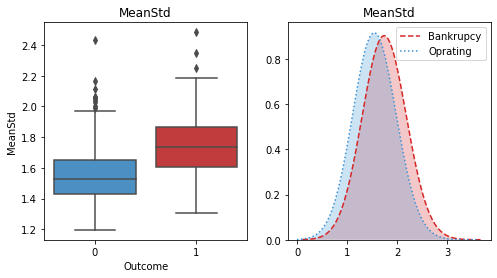

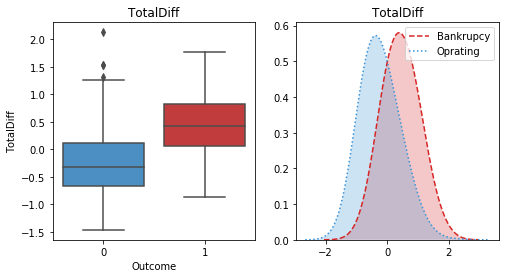

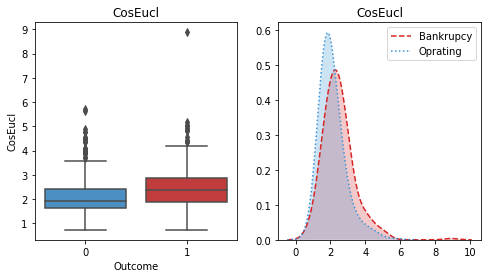

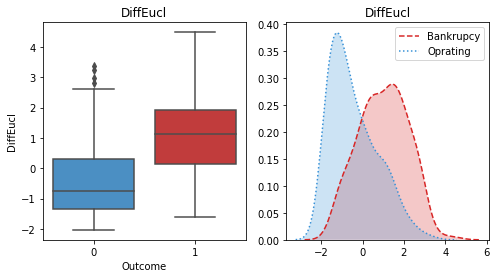

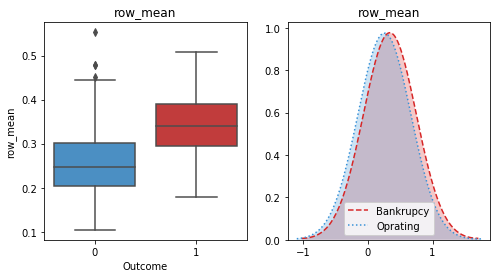

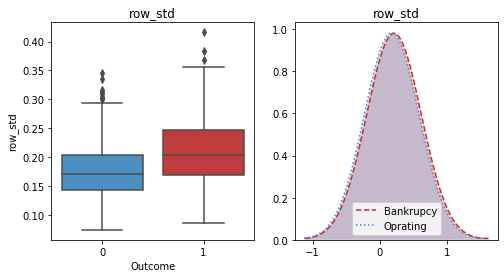

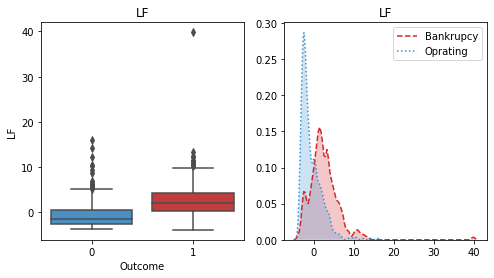

In [292]:
column_headers = ['MeanStd','TotalDiff','CosEucl','DiffEucl','row_mean','row_std','LF']
colors = ['#3791D7','#D72626']

for column in column_headers:    
    plt.figure(figsize=[8,4])
    plt.subplot(121)
    sns.boxplot(x='Outcome', y=column,data=df7,palette=colors)
    plt.title(column, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(df7[df7['Outcome']==1][column], bw = 0.4, label = "Bankrupcy", shade=True, color="#D72626", linestyle="--")
    sns.kdeplot(df7[df7['Outcome']==0][column], bw = 0.4, label = "Oprating", shade=True, color= "#3791D7", linestyle=":")
    plt.title(column, fontsize=12)
    plt.show()

In [293]:
selected_vars = df7.columns
selected_vars

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'TotalDiff', 'row_mean', 'row_std', 'row_median', 'row_min', 'row_max', 'MeanStd', 'MinMax', 'Outcome', 'CosineMed_1', 'CosineMean_1', 'EuclideanMean1', 'EuclideanMed1', 'Avg_Cosine', 'Avg_Eucl', 'CosEucl', 'DiffEucl', 'LF'], dtype='object')

In [294]:
selected_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 
                 'Age', 'TotalDiff', 'row_mean', 'row_std', 'row_median', 'row_min', 'row_max', 
                 'MeanStd', 'MinMax', 'Outcome', 'Avg_Cosine', 'Avg_Eucl', 'CosEucl','DiffEucl','LF']
df7 = df7[selected_vars]
X = df7.drop(['Outcome'],axis=1) #independent columns
y = df7['Outcome']    #target column i.e price range

scaled_df7 = pd.concat([X,y],axis=1)
scaled_df7.to_csv('ds-exp07.csv', index = False)
print(scaled_df7.shape)

(768, 22)


In [295]:
scaled_df7.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax,Avg_Cosine,Avg_Eucl,CosEucl,DiffEucl,LF,Outcome
0,0.353,0.671,0.490,0.304,0.170,0.315,0.234,0.483,0.725,0.378,0.162,0.334,0.170,0.671,1.715,0.771,0.978,0.241,4.063,3.012,12.239,1
1,0.059,0.265,0.429,0.239,0.170,0.172,0.117,0.167,-0.680,0.202,0.112,0.171,0.059,0.429,1.369,0.474,0.940,0.498,1.887,-1.365,-2.576,0
2,0.471,0.897,0.408,0.241,0.170,0.104,0.254,0.183,0.432,0.341,0.256,0.247,0.104,0.897,1.816,1.342,0.928,0.435,2.136,0.993,2.122,1
3,0.059,0.290,0.429,0.174,0.096,0.202,0.038,0.000,-1.008,0.161,0.144,0.135,0.000,0.429,1.357,0.535,0.917,0.564,1.624,-1.785,-2.900,0
4,0.000,0.600,0.163,0.304,0.185,0.509,0.944,0.200,0.610,0.363,0.304,0.252,0.000,0.944,1.949,1.569,0.725,0.891,0.815,0.684,0.558,1
5,0.294,0.465,0.510,0.241,0.170,0.151,0.053,0.150,-0.262,0.254,0.161,0.205,0.053,0.510,1.514,0.612,0.966,0.326,2.959,-0.804,-2.379,0
6,0.176,0.219,0.265,0.272,0.089,0.262,0.073,0.083,-0.857,0.180,0.087,0.198,0.073,0.272,1.306,0.237,0.929,0.566,1.641,-1.513,-2.483,1
7,0.588,0.458,0.494,0.241,0.170,0.350,0.024,0.133,0.162,0.307,0.197,0.295,0.024,0.588,1.656,0.777,0.914,0.417,2.191,0.388,0.851,0
8,0.118,0.987,0.469,0.413,0.636,0.252,0.034,0.533,1.146,0.430,0.305,0.441,0.034,0.987,2.086,1.649,0.902,0.690,1.308,1.662,2.173,1
9,0.471,0.523,0.735,0.241,0.170,0.292,0.066,0.550,0.750,0.381,0.225,0.381,0.066,0.735,1.832,1.017,0.936,0.442,2.120,1.699,3.602,1


In [296]:
X[X.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,TotalDiff,row_mean,row_std,row_median,row_min,row_max,MeanStd,MinMax,Avg_Cosine,Avg_Eucl,CosEucl,DiffEucl,LF


In [297]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

print(X_train.shape, X_test.shape)
print(y_train.sum()/len(y_train))
print(y_test.sum()/len(y_test))

(576, 21) (192, 21)
0.3489583333333333
0.3489583333333333


Feature ranking:
1. feature 19 (0.082086)
2. feature 20 (0.080232)
3. feature 8 (0.079928)
4. feature 9 (0.076561)
5. feature 1 (0.064084)
6. feature 14 (0.052344)
7. feature 11 (0.048646)
8. feature 16 (0.046118)
9. feature 15 (0.045154)
10. feature 17 (0.044992)
11. feature 5 (0.044957)
12. feature 18 (0.041982)
13. feature 6 (0.041665)
14. feature 7 (0.041513)
15. feature 13 (0.040389)
16. feature 12 (0.036115)
17. feature 10 (0.035674)
18. feature 2 (0.033453)
19. feature 0 (0.024695)
20. feature 4 (0.021527)
21. feature 3 (0.017885)


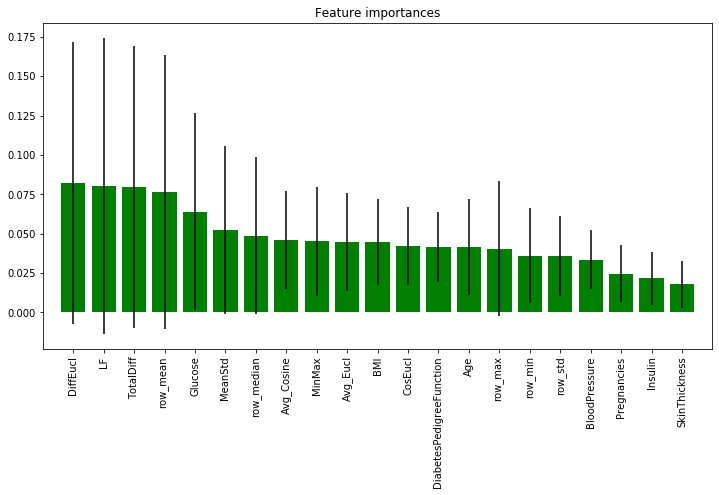

In [298]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()